# Drug Classification using Machine Learnig Algorithms


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("drug200.csv")
df.shape


(200, 6)

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


There are 6 rows which are not null in the dataset

In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
cl=df.columns
print(cl)
print(len(cl))

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')
6


In [8]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

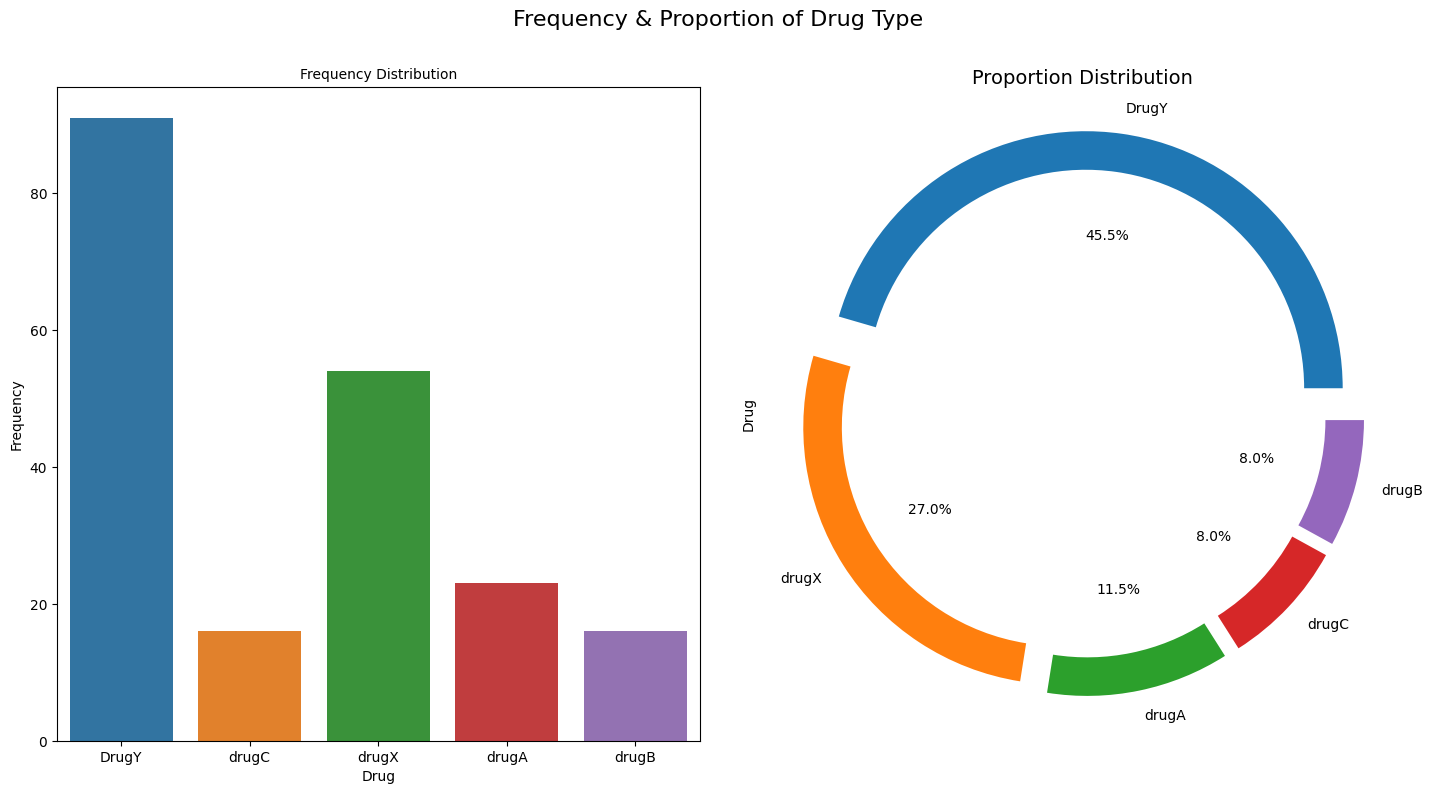

In [9]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'Drug', data = df)
plt.xlabel(xlabel = 'Drug', size = 10)
plt.ylabel(ylabel = 'Frequency', size = 10)
plt.title(label = 'Frequency Distribution', size = 10)

plt.subplot(1, 2, 2)
space = np.ones(5)/10
df.Drug.value_counts().plot(kind = 'pie', explode = space, fontsize = 10, autopct = '%3.1f%%', 
                                 wedgeprops = dict(width=0.15), figsize = [15, 8])
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Drug Type', y = 1.02, size = 16)
plt.show()

In [10]:
# One Hot Encoding ::
df_dummy = pd.get_dummies(df[['Age','Sex','BP','Cholesterol','Na_to_K']],drop_first=True)
df_dummy.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0


In [11]:
df_dummy['Sex_M'].value_counts().reset_index()


,index,Sex_M
0,1,104
1,0,96


In [12]:
df_dummy[['BP_LOW','BP_NORMAL']].value_counts().reset_index().rename(columns = {0:'Total'})

,BP_LOW,BP_NORMAL,Total
0,0,0,77
1,1,0,64
2,0,1,59


In [13]:
df_dummy['Cholesterol_NORMAL'].value_counts().reset_index()

,index,Cholesterol_NORMAL
0,0,103
1,1,97


In [14]:
df_dummy['Drug']=df['Drug']

In [15]:
df_dummy.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug
0,23,25.355,0,0,0,0,DrugY
1,47,13.093,1,1,0,0,drugC
2,47,10.114,1,1,0,0,drugC
3,28,7.798,0,0,1,0,drugX
4,61,18.043,0,1,0,0,DrugY


# Modelling

In [16]:
#Importing all the required libraries for modelling purpose:

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [17]:
y = df_dummy['Drug']
X = df_dummy.drop('Drug',axis=1)

In [18]:
X.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0


In [19]:
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [20]:
y.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [21]:
# Dividing the dataset into train_test_split:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=35)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 6)
(160,)
(40, 6)
(40,)


In [23]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
train_pred= rf.predict(X_train)

In [24]:
accuracy = metrics.accuracy_score(y_train,train_pred)
accuracy*100

100.0

In [25]:
test_pred = rf.predict(X_test)

In [26]:
accuracy = metrics.accuracy_score(y_test,test_pred)
accuracy*100

100.0

In [27]:
# Checking the classification report
classification_report = metrics.classification_report(y_test,test_pred)
print(classification_report)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        19
       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



As we see Random Forest Classifier gives 100% accuracy which execellent result now we save the model and make the predictions

In [28]:
import pickle
filename = 'rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [29]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

1.0
